# Experimentation: Data Pre-Processing
---

In [14]:
import torch
import monai

from monai.data import (Dataset, ArrayDataset, create_test_image_3d, DataLoader, DataLoader, 
CacheDataset, PersistentDataset, SmartCacheDataset)

from monai.transforms import (Transform, MapTransform, Randomizable, EnsureChannelFirst, EnsureChannelFirstd,
Compose, LoadImage, LoadImaged, Lambda, Lambdad, RandSpatialCrop, RandSpatialCropd, RandGaussianNoise,
RandGaussianNoised, Orientation, Rotate, MapTransform)

from monai.apps import DecathlonDataset, TciaDataset
from monai.apps.tcia import TCIA_LABEL_DICT
import pydicom
collection, seg_type = "HCC-TACE-Seg", "SEG"



dataset = TciaDataset(
    root_dir="./Data/",
    collection=collection,
    section="training",
    download=True,
    download_len=1,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.2,
)

c:\Users\20182573\Anaconda3\envs\Q2-5LSH0\lib\site-packages\monai\apps\utils.py:115: UserWarning: tqdm is not installed, will not show the downloading progress bar.
  warnings.warn("tqdm is not installed, will not show the downloading progress bar.")


2024-03-08 11:41:42,206 - INFO - Downloaded: Data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip
2024-03-08 11:41:42,210 - INFO - Expected md5 is None, skip md5 check for file Data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip.
2024-03-08 11:41:42,215 - INFO - Writing into directory: Data\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.
2024-03-08 11:41:56,964 - INFO - Downloaded: Data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip
2024-03-08 11:41:56,969 - INFO - Expected md5 is None, skip md5 check for file Data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip.
2024-03-08 11:41:56,973 - INFO - Writing into directory: Data\HCC-TACE-Seg\HCC_017\300\image.


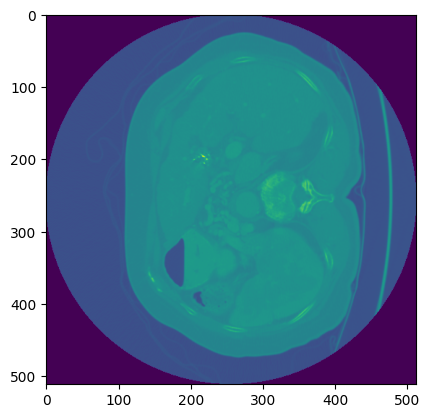

In [18]:
import matplotlib.pyplot as plt 

plt.imshow(dataset[0]['image'].numpy()[..., 27])
plt.show()

ValueError: Argument Z must be 2-dimensional.

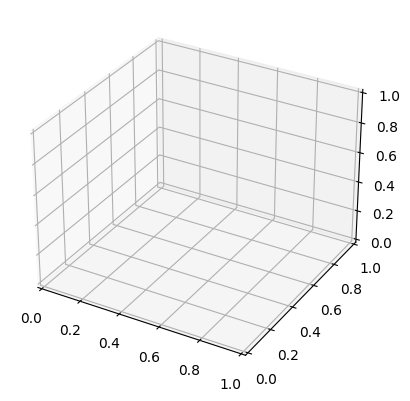

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pydicom

# Load DICOM file
ds = pydicom.dcmread("./Data/HCC-TACE-Seg/HCC_017/300/seg/00000001.dcm")

# Extract pixel data
image = ds.pixel_array

# Get dimensions
x = np.arange(image.shape[0])
y = np.arange(image.shape[1])
x, y = np.meshgrid(x, y)

# Display DICOM image in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, image, cmap='gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pixel Value')
plt.show()
